In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
names = []
with open('adult_income_names.txt','r') as f:
  for line in f:
    f.readline()
    var=line.split(':')[0]
    names.append(var)

names.append('Income')
names

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/data-wrangling-python/master/lab04/datasets/adult_income_data.csv', names=names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [ ]:
df_s = df[   ['age','education','occupation']   ]
df_s

In [ ]:
df_s['age'].hist(bins=20)

In [22]:
vars_class = ['workclass','education','marital-status',
              'occupation','relationship','sex','native-country']

In [32]:
for v in vars_class:
  classes = df[v].unique()
  num = df[v].nunique()
  print("There {}  classes in the {} column. They are: {} ".format(num,v, classes))
  print("-"*100)

There 9  classes in the workclass column. They are: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
----------------------------------------------------------------------------------------------------
There 16  classes in the education column. They are: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
----------------------------------------------------------------------------------------------------
There 7  classes in the marital-status column. They are: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
----------------------------------------------------------------------------------------------------
There 15  classes in the occupation column. They are: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 

In [27]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [28]:
def strip_whitespace(s):
  return s.strip()

In [31]:
for v in vars_class:
  df[v] = df[v].apply(strip_whitespace)



In [37]:
df_age_f = df[  (df['age']>=30) &  (df['age']<=50)]

In [36]:
(df['age']>=30).sum()

22850

In [39]:
df_age_f.shape[0]

16390

In [42]:
dff = df.groupby('occupation').describe()['age']

dff

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


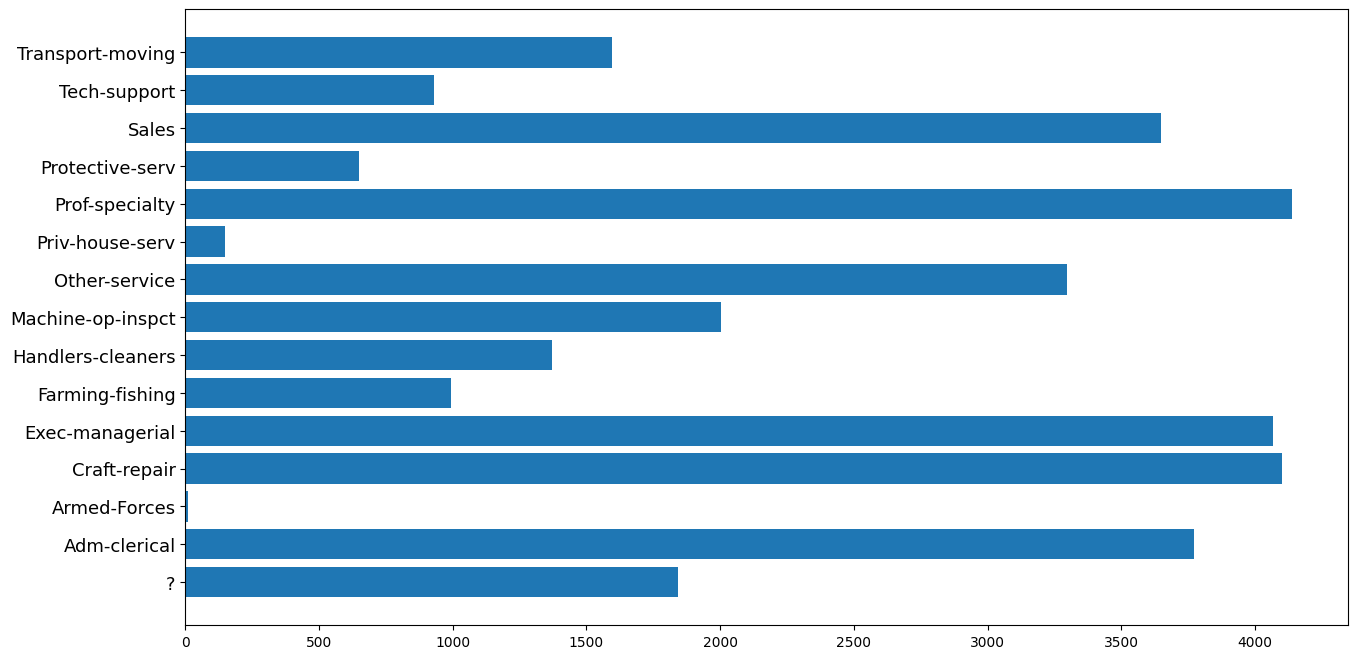

In [45]:
plt.figure( figsize=(15,8) )

plt.barh(y=dff.index, width=dff['count']  )

plt.yticks( fontsize=13 )


plt.show()